# Visualize results

In [16]:
import math
import numpy as np
import torch
import torch.nn as nn

In [17]:
nb_params = 8
ffn_dim = 128
torch.manual_seed(0)
print(torch.rand(ffn_dim, nb_params))
torch.manual_seed(0)

with torch.no_grad():
    params = torch.rand(ffn_dim, nb_params)
    params *= 2
    params -= 1
print(params)

weights = nn.Linear(2, 128).weight

fan_in = weights.size(1)

s_ind = 0
e_ind = s_ind + fan_in

bound = 1 / math.sqrt(fan_in)
w1 = params[:, s_ind:e_ind]
w1 *= bound

s_ind = e_ind
e_ind = s_ind + fan_in
bound = 1 / math.sqrt(fan_in)
w1 = params[:, s_ind:e_ind]
w1 *= bound


tensor([[0.4963, 0.7682, 0.0885,  ..., 0.6341, 0.4901, 0.8964],
        [0.4556, 0.6323, 0.3489,  ..., 0.1689, 0.2939, 0.5185],
        [0.6977, 0.8000, 0.1610,  ..., 0.9152, 0.3971, 0.8742],
        ...,
        [0.4575, 0.1101, 0.4969,  ..., 0.7898, 0.1523, 0.1630],
        [0.3779, 0.3629, 0.5846,  ..., 0.1556, 0.4647, 0.7796],
        [0.9325, 0.4635, 0.2107,  ..., 0.1876, 0.2099, 0.7210]])
tensor([[0.4963, 0.7682, 0.0885,  ..., 0.6341, 0.4901, 0.8964],
        [0.4556, 0.6323, 0.3489,  ..., 0.1689, 0.2939, 0.5185],
        [0.6977, 0.8000, 0.1610,  ..., 0.9152, 0.3971, 0.8742],
        ...,
        [0.4575, 0.1101, 0.4969,  ..., 0.7898, 0.1523, 0.1630],
        [0.3779, 0.3629, 0.5846,  ..., 0.1556, 0.4647, 0.7796],
        [0.9325, 0.4635, 0.2107,  ..., 0.1876, 0.2099, 0.7210]])


In [20]:
    @classmethod
    def kaiming_uniform_(cls, tensor, a=0, mode="fan_in", nonlinearity="leaky_relu"):
        fan = tensor.size(1)
        bound = 1 / math.sqrt(fan)
        with torch.no_grad():
            return tensor.uniform_(-bound, bound)

    @staticmethod
    def _calculate_correct_gain(tensor, mode):
        if mode == "fan_in":
            fan = tensor.size(1)
        elif mode == "fan_out":
            fan = tensor.size(0)
        return fan

    @staticmethod
    def _calculate_gain(param):
        return 

    def reset_parameters(self) -> None:
        # Setting a=sqrt(5) in kaiming_uniform is the same as initializing with
        # uniform(-1/sqrt(in_features), 1/sqrt(in_features)). For details, see
        # https://github.com/pytorch/pytorch/issues/57109
        self.kaiming_uniform_(self.weight, a=math.sqrt(5))
        if self.bias is not None:
            fan_in = self.weight.size(1)
            bound = 1 / math.sqrt(fan_in) if fan_in > 0 else 0
            self.bias = torch.uniform_(-bound, bound)

torch.Size([128, 2])

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from analysis import load_configs, load_experimental_results, extract_all_runs_info, extract_run_info

/usr/bin/pdflatex


In [2]:
all_configs = load_configs()
keys = ["batch_size", "lr", "mlp_lr_discount", "ffn_dim", "seed", "id"]
data = load_experimental_results(all_configs, keys)

run_info = extract_all_runs_info(data)

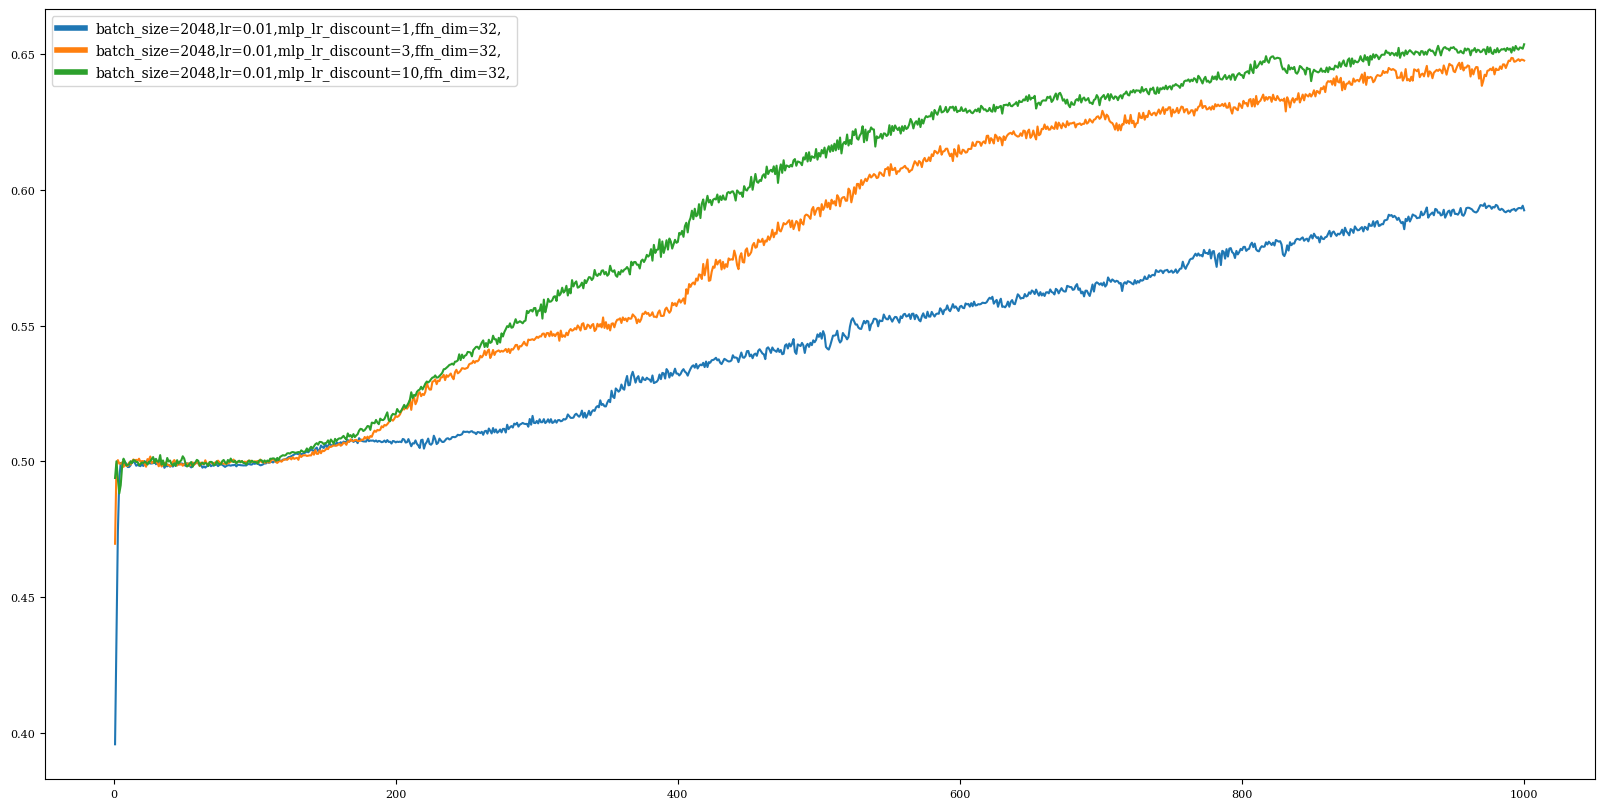

In [37]:
from itertools import product

grid_kwargs = {
    "batch_size": [2048],
    "lr": [1e-2],
    "mlp_lr_discount": [1, 3, 10],
    "ffn_dim": [32],
}
ind = "test_acc"
# ind = "success"

fig, ax = plt.subplots(figsize=(20, 10))
for i, values in enumerate(product(*grid_kwargs.values())):
    kwargs = dict(zip(grid_kwargs.keys(), values))
    mean, std = extract_run_info(data, **kwargs)
    ax.plot(mean[ind], label="".join([f"{key}={value}," for key, value in kwargs.items()]))
    # ax.fill_between(mean.index, mean[ind] - std[ind], mean[ind] + std[ind], alpha=0.5)
leg = ax.legend(fontsize=10)
for line in leg.get_lines():
    line.set_linewidth(4.0)


From the previous print, we see that we never overfit the train set, yet we do sometime have an accuracy collapse after having reached 100 \% accuracy.